In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy.io import fits, ascii
from astropy.table import Table
from corner import hist2d
#%config InlineBackend.figure_format = 'retina'
%matplotlib notebook

In [2]:
mg_sample = fits.open('Catalogs/mactivity_movinggroups_confirmed.fits')
wd_sample = Table.read('Catalogs/WD_M_Pairs_new.csv')

In [4]:
mask_parallax = ((np.array(wd_sample['parallax_m'])/np.array(wd_sample['parallax_error_m']) > 8)
                * (np.array(wd_sample['parallax_wd'])/np.array(wd_sample['parallax_error_wd']) > 4))
N_wd_sample = len(np.array(wd_sample['ra_m'][mask_parallax]))
ra_wd_sample = np.array(wd_sample['ra_m'][mask_parallax])
dec_wd_sample = np.array(wd_sample['dec_m'][mask_parallax])
spt_wd_sample = np.array(wd_sample['SPT_m'][mask_parallax])
g_wd_sample = np.array(wd_sample['phot_g_mean_mag_m'][mask_parallax])
rp_wd_sample = np.array(wd_sample['phot_rp_mean_mag_m'][mask_parallax])
bp_wd_sample = np.array(wd_sample['phot_bp_mean_mag_m'][mask_parallax])
parallax_wd_sample = np.array(wd_sample['parallax_m'][mask_parallax])
parallax_error_wd_sample = np.array(wd_sample['parallax_error_m'][mask_parallax])
ewha_wd_sample = np.array(wd_sample['ewha_m'][mask_parallax])
ewha_error_wd_sample = np.array(wd_sample['ewha_error_m'][mask_parallax])
lhalbol_wd_sample = np.array(wd_sample['lhalbol_m'][mask_parallax])
lhalbol_error_wd_sample = np.array(wd_sample['lhalbol_error_m'][mask_parallax])
age_wd_sample = np.array(wd_sample['Total_Age(yr)'][mask_parallax])
age_error_wd_sample = np.ones(N_wd_sample)*np.nan
group_num_wd_sample = np.ones(N_wd_sample)*0
group_name_wd_sample = np.array(['WD' for x in range(N_wd_sample)])
source_num_wd_sample = np.ones(N_wd_sample)*0
source_ref_wd_sample = np.array(['this work' for x in range(N_wd_sample)])

In [5]:
fullsample = Table()

In [6]:
fullsample['ra'] = np.concatenate((mg_sample[1].data['ra'],ra_wd_sample))
fullsample['dec'] = np.concatenate((mg_sample[1].data['dec'],dec_wd_sample))
fullsample['spt'] = np.concatenate((mg_sample[1].data['spt'],spt_wd_sample))
fullsample['g'] = np.concatenate((mg_sample[1].data['phot_g_mean_mag'],g_wd_sample))
fullsample['rp'] = np.concatenate((mg_sample[1].data['phot_rp_mean_mag'],rp_wd_sample))
fullsample['bp'] = np.concatenate((mg_sample[1].data['phot_bp_mean_mag'],bp_wd_sample))
fullsample['parallax'] = np.concatenate((mg_sample[1].data['parallax'],parallax_wd_sample))
fullsample['parallax_error'] = np.concatenate((mg_sample[1].data['parallax_error'],parallax_error_wd_sample))
fullsample['ewha'] = np.concatenate((mg_sample[1].data['ewha'],ewha_wd_sample))
fullsample['ewha_error'] = np.concatenate((mg_sample[1].data['ewha_error'],ewha_error_wd_sample))
fullsample['age'] = np.concatenate((mg_sample[1].data['age']*1e6,age_wd_sample))
fullsample['age_error'] = np.concatenate((mg_sample[1].data['age_error']*1e6,age_error_wd_sample))
fullsample['group_num'] = np.concatenate((mg_sample[1].data['group_num'],group_num_wd_sample))
fullsample['group_name'] = np.concatenate((mg_sample[1].data['group_name'],group_name_wd_sample))
fullsample['source_num'] = np.concatenate((mg_sample[1].data['source_num'],source_num_wd_sample))
fullsample['soruce_ref'] = np.concatenate((mg_sample[1].data['source_ref'],source_ref_wd_sample))

In [7]:
g_rp_all = fullsample['g'] - fullsample['rp']
g_abs_all = fullsample['g'] - 5*(np.log10(1e3/fullsample['parallax'])-1)
age_all = fullsample['age']

In [8]:
target_url = 'https://zenodo.org/record/2636692/files/MLSDSS-GaiaDR2_extended.fits?download=1'
mlsdss = fits.open(target_url)

In [9]:
G = mlsdss[1].data['phot_g_mean_mag']
RP = mlsdss[1].data['phot_rp_mean_mag']
BP = mlsdss[1].data['phot_bp_mean_mag']
G_RP = G-RP
parallax = mlsdss[1].data['parallax']
dist = 1e3/parallax
G_abs = G + 5.0 - 5.0*np.log10(dist) 
r_ext = mlsdss[1].data['EXTINCTION'][:,2]
z_ext = mlsdss[1].data['EXTINCTION'][:,4]
ext = r_ext-z_ext


subred = mlsdss[1].data['photometric_sample_subred'] == 1
mask_ext = ext < 0.1

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


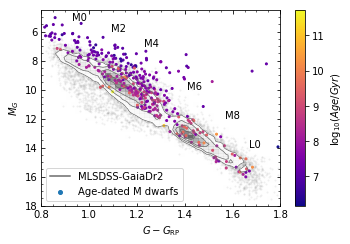

In [10]:
contour_color = 'dimgray'

plt.figure(figsize=(5,3.5))

hist2d(G_RP[subred*mask_ext], G_abs[subred*mask_ext],
       bins=50,plot_contours=True,plot_datapoints=True, color=contour_color,
       contour_kwargs={"linewidths":0.7})
plt.scatter(g_rp_all,g_abs_all,c=np.log10(age_all),s=4,cmap='plasma',label='Age-dated M dwarfs')
plt.plot([0,1],[0,1],color=contour_color,label='MLSDSS-GaiaDr2')
plt.ylim(18,4.5)
plt.xlim(0.8,1.8)
plt.xlabel(r'$G-G_{\rm RP}$')
plt.ylabel(r'$M_G$')
plt.tick_params('both',direction='in',top=True,right=True)
plt.minorticks_on()
plt.tick_params('both',which='minor',direction='in',top=True,right=True)
plt.colorbar(label=r'$\log_{10}(Age/Gyr)$')
plt.text(0.93,5.2,'M0')
plt.text(1.09,6,'M2')
plt.text(1.23,7,'M4')
plt.text(1.41,10,'M6')
plt.text(1.57,12,'M8')
plt.text(1.67,14,'L0')
plt.legend(loc=3,markerscale=2)
plt.tight_layout()


<IPython.core.display.Javascript object>


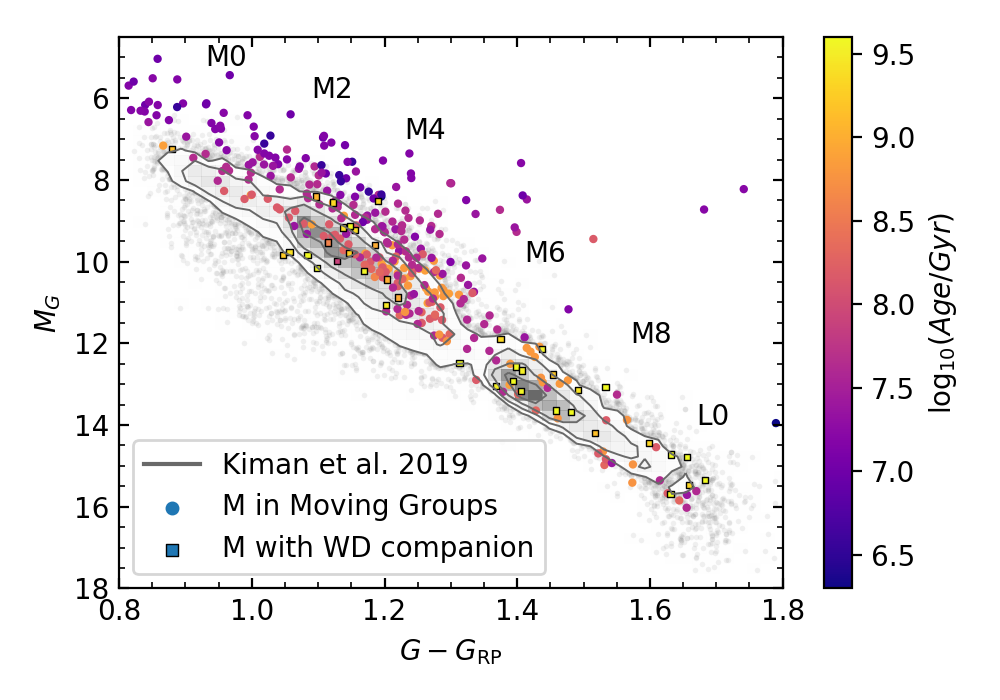

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


In [13]:
contour_color = 'dimgray'

mask_wd = fullsample['group_num'] == 0
vmax,vmin = 9.6,6.3

plt.figure(figsize=(5,3.5))

hist2d(G_RP[subred*mask_ext], G_abs[subred*mask_ext],
       bins=50,plot_contours=True,plot_datapoints=True, color=contour_color,
       contour_kwargs={"linewidths":0.7},label='MLSDSS-GaiaDr2')
plt.scatter(g_rp_all[~mask_wd],g_abs_all[~mask_wd],c=np.log10(age_all[~mask_wd]),
            s=4,cmap='plasma',label='M in Moving Groups',vmax=vmax,vmin=vmin)
plt.scatter(g_rp_all[mask_wd],g_abs_all[mask_wd],c=np.log10(age_all[mask_wd]),
            s=5,cmap='plasma',label='M with WD companion',marker='s',vmax=vmax,vmin=vmin,
            edgecolors='k',linewidth=0.5)
plt.plot([0,1],[0,1],color=contour_color,label='Kiman et al. 2019')
plt.ylim(18,4.5)
plt.xlim(0.8,1.8)
plt.xlabel(r'$G-G_{\rm RP}$')
plt.ylabel(r'$M_G$')
plt.tick_params('both',direction='in',top=True,right=True)
plt.minorticks_on()
plt.tick_params('both',which='minor',direction='in',top=True,right=True)
plt.colorbar(label=r'$\log_{10}(Age/Gyr)$')
plt.legend(loc=3,markerscale=2)
plt.text(0.93,5.2,'M0')
plt.text(1.09,6,'M2')
plt.text(1.23,7,'M4')
plt.text(1.41,10,'M6')
plt.text(1.57,12,'M8')
plt.text(1.67,14,'L0')
plt.tight_layout()
plt.savefig('/Users/rociokiman/Documents/PhD/Proposals/2019 NSF Jackie/Figures/CMD_with_ages.png',dpi=300)

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


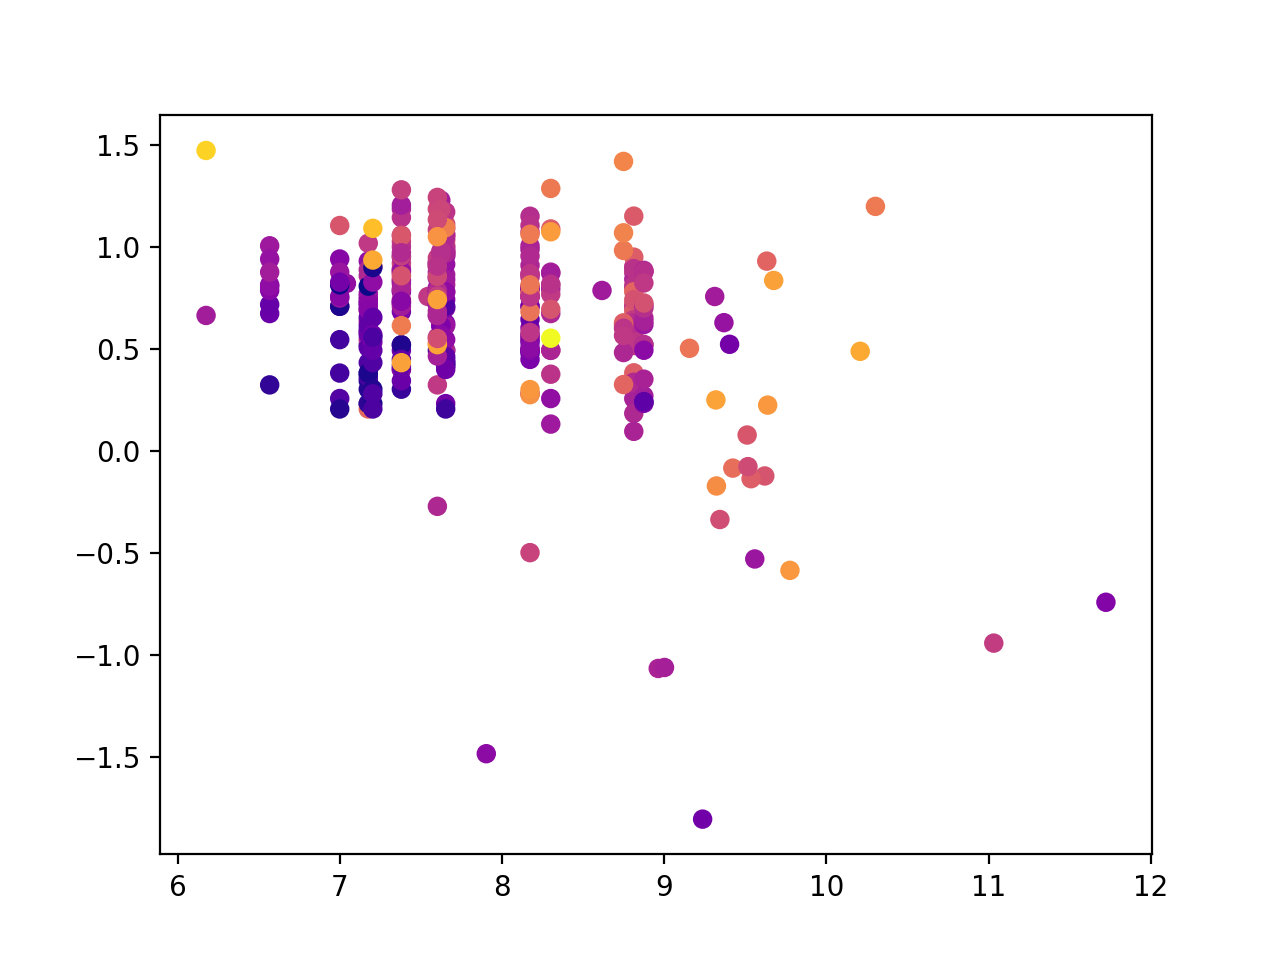

In [19]:
plt.scatter(np.log10(fullsample['age']),np.log10(fullsample['ewha']),c=fullsample['g']-fullsample['rp'],
            cmap='plasma')